In [1]:
# Import packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso

%matplotlib inline

# Growth Challenge

To start the exploration process, we first had a look at the data.

In [2]:
train_data=pd.read_csv('./growth_train.csv').drop("Unnamed: 0",axis=1)
train_data

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,Argentina,"0,617645085",0,"4462,001465","0,156622976","4,989999771","0,933333337","1,933333278"
1,United States,"1,712264895",0,"9895,003906","0,160815045","8,659999847",0,"0,433333337"
2,Peru,"0,060205959",0,"2019,000244","0,324612707","3,019999981","0,266666681","0,566666663"
3,Italy,"2,932981491",0,"4564,000488","0,330021679","4,559999943","0,033333335","1,200000048"
4,Greece,"3,224050045",0,2093,"0,337879002","4,369999886","0,166666672","0,166666672"
5,France,"2,431280851",0,"5823,000488","0,339706242","4,650000095",0,"0,300000012"
6,Zaire,"-2,811944485",0,"488,9999084","0,352317631","0,540000021","0,148148149","0,055555556"
7,Uruguay,"1,025308609",0,"3967,999756","0,358856708","5,070000172",0,"0,166666672"
8,Pakistan,"2,698163033",0,638,"0,41760394","0,629999995","0,266666681","0,266666681"
9,Niger,"-2,751477957",0,"531,9998779","0,425837249","0,200000003","0,13333334",0


Apparently, we have only very little training data available. 

## Data pre-processing

### 1) Transform data into the correct format

In [3]:
# we only have numerical features, fist let's check their current data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country_name   45 non-null     object
 1   growth         45 non-null     object
 2   oil            45 non-null     int64 
 3   rgdp60         45 non-null     object
 4   tradeshare     45 non-null     object
 5   yearsschool    45 non-null     object
 6   rev_coups      45 non-null     object
 7   assasinations  45 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.9+ KB


In [4]:
# typecast all values of the numerical features as float type
train_data["growth"]=train_data.growth.apply(lambda x: x.replace(",",".")).astype(float)
train_data["rgdp60"]=train_data.rgdp60.apply(lambda x: x.replace(",",".")).astype(float)
train_data["tradeshare"]=train_data.tradeshare.apply(lambda x: x.replace(",",".")).astype(float)
train_data["yearsschool"]=train_data.yearsschool.apply(lambda x: x.replace(",",".")).astype(float)
train_data["rev_coups"]=train_data.rev_coups.apply(lambda x: x.replace(",",".")).astype(float)
train_data["assasinations"]=train_data.assasinations.apply(lambda x: x.replace(",",".")).astype(float)

In [5]:
train_data.describe(include='all')

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
count,45,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000
unique,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.847426,0.0,2997.489067,0.582602,3.740222,0.191934,0.277531
std,NaN,2.016963,0.0,2523.564715,0.220926,2.353967,0.254682,0.545096
min,NaN,-2.811944,0.0,366.999939,0.156623,0.200000,0.000000,0.000000
25%,NaN,0.617645,0.0,1133.000000,0.455769,1.700000,0.000000,0.000000
50%,NaN,1.712265,0.0,1869.000000,0.552722,3.450000,0.066667,0.066667
75%,NaN,2.889185,0.0,4963.998535,0.681555,4.990000,0.266667,0.200000


### 2) Data Quality: Check for missing values

In [6]:
# Check how many values are missing
train_data.isna().sum()

country_name     0
growth           0
oil              0
rgdp60           0
tradeshare       0
yearsschool      0
rev_coups        0
assasinations    0
dtype: int64

Apparently there are no missing values.

### 3) Remove not relevant columns

Since the column oil contained only 0's we will did ot consider it. Further, we dropped the column containing the country name since we only had one data point for each country in either the training or the (official) test data set, hence it did not contain any useful information the model could infer from the training to the test data. 

In [7]:
train_data.drop(["oil", "country_name"], axis=1, inplace=True)

### 4) Check Data Distribution

To get a felling for the data, we had a look at the distribution by plotting a boxplot and a scatter polt for each pair of 2 features.

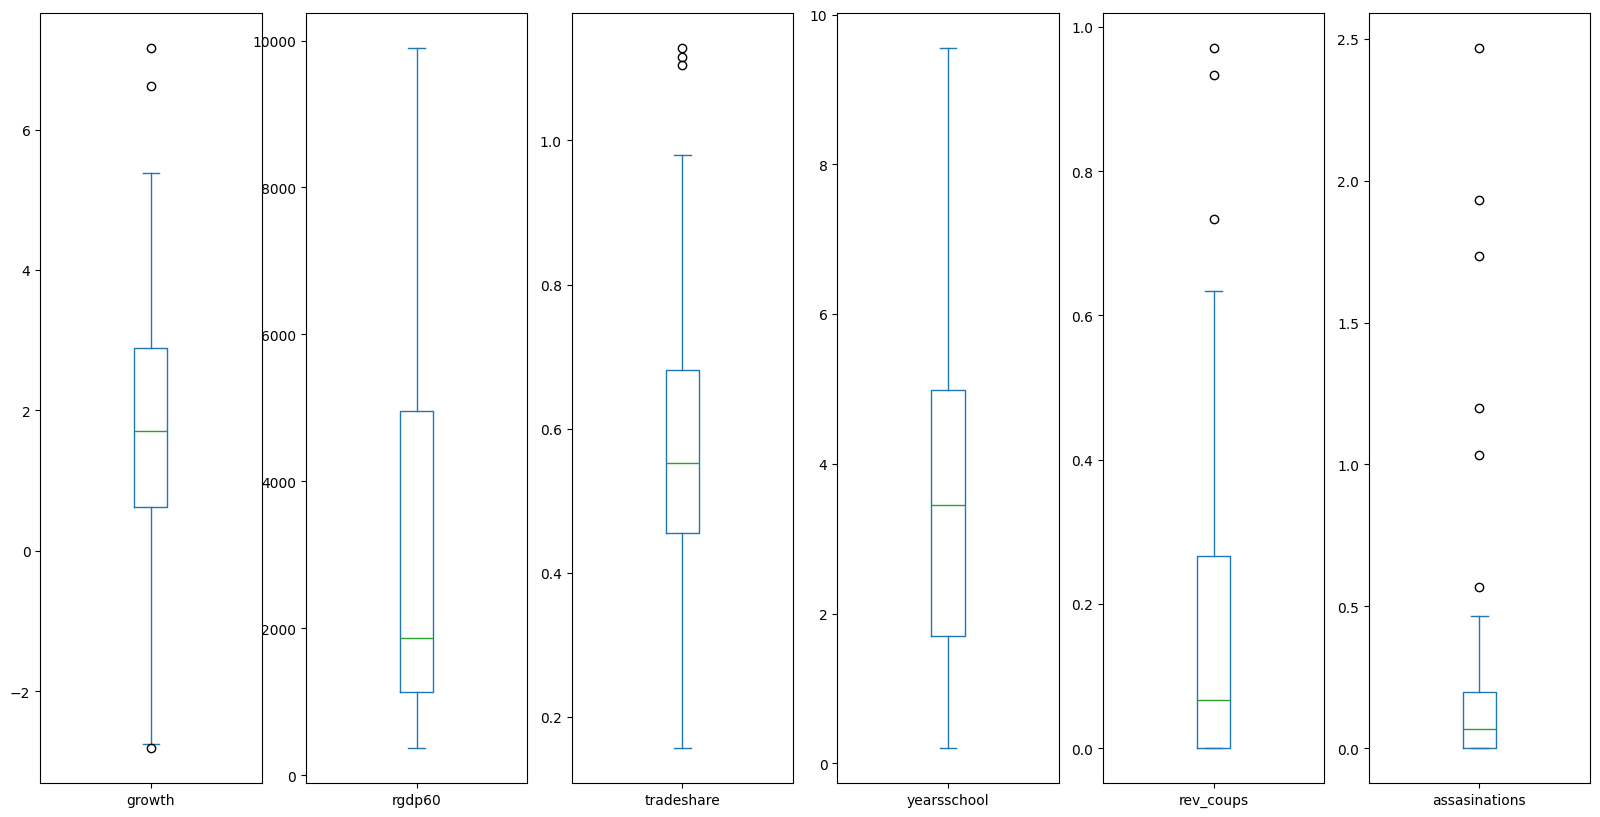

In [8]:
train_data.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

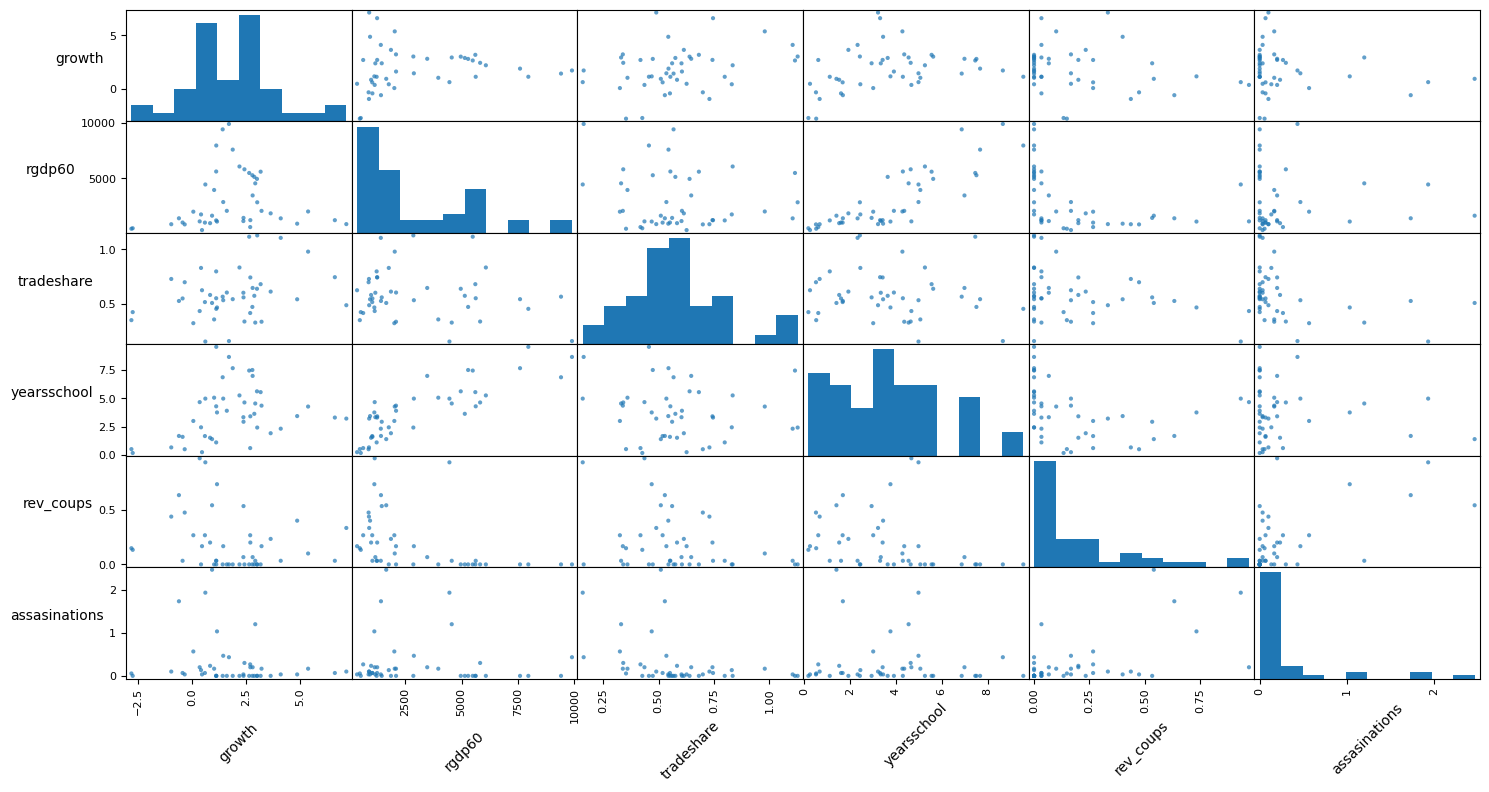

In [9]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(train_data,figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### 5) Check the correlation 
By plotting the correlation matrix, we wanted to examine the correlation between the features and the target variable on the one hand and the correlation between the features on the other hand. By looking at the correlation between the target variable and the features we could identify features that do not have a big impact on the value we want to predict and hence do not have to be considered for our model. The the smallest absolute correlation with 'growth' had the feature 'rgdp60', but 0.11 seemed related enough, and we decided to keep all features. Further, checking the correlation between the features allowed us to find features with a strong linear dependency. 'rgdp60' and 'yearsschool' had the highest correlation.

<Axes: >

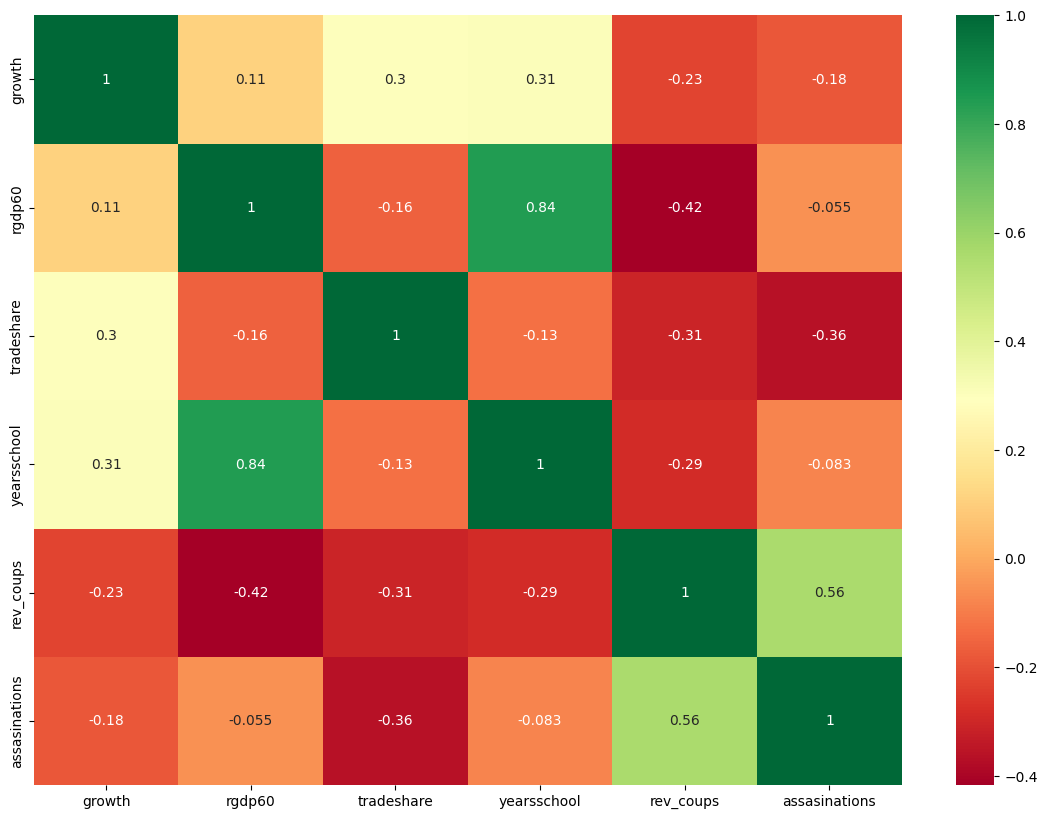

In [10]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(train_data.corr(method='pearson'), annot=True,cmap ='RdYlGn')

### Test-train split to avoid overfitting my model
Since we have no labels for the provided test data set, we have to split the training data into a test and training set where we can use the training data to train the model and the test data to prevent overfitting.This had to happen before we apply steps like scaling, since this should only be applied to the data used for model training and not for the test data.

In [11]:
X_base = train_data.drop(["growth"], axis = 1)
y = train_data["growth"]

X_train_base, X_test_base, y_train, y_test = train_test_split(X_base,y, test_size=0.2,shuffle=True, random_state=42)

### Handle skewed data

We recognized that of the remaining five features, three were skewed having most data at the value 0. Skewed data can be a problem, which is why we applied a log transformation to transform the distribution more into a normal distribution shape. Since we wanted to evaluate if this is actually improving model training, we kept a version of the untransformed data. The transformations also have to be applied to the test data.

In [12]:
X_train_transformed = X_train_base.copy()
X_test_transformed = X_test_base.copy()

In [13]:
epsilon = 0.001
X_train_transformed["rgdp60"]=X_train_base["rgdp60"].apply(lambda x: np.log(x + epsilon))
X_test_transformed["rgdp60"]=X_test_base["rgdp60"].apply(lambda x: np.log(x + epsilon))

X_train_transformed["rev_coups"]=X_train_base["rev_coups"].apply(lambda x: np.log(x + epsilon))
X_test_transformed["rev_coups"]=X_test_base["rev_coups"].apply(lambda x: np.log(x + epsilon))


X_train_transformed["assasinations"]=X_train_base["assasinations"].apply(lambda x: np.log(x + epsilon))
X_test_transformed["assasinations"]=X_test_base["assasinations"].apply(lambda x: np.log(x + epsilon))

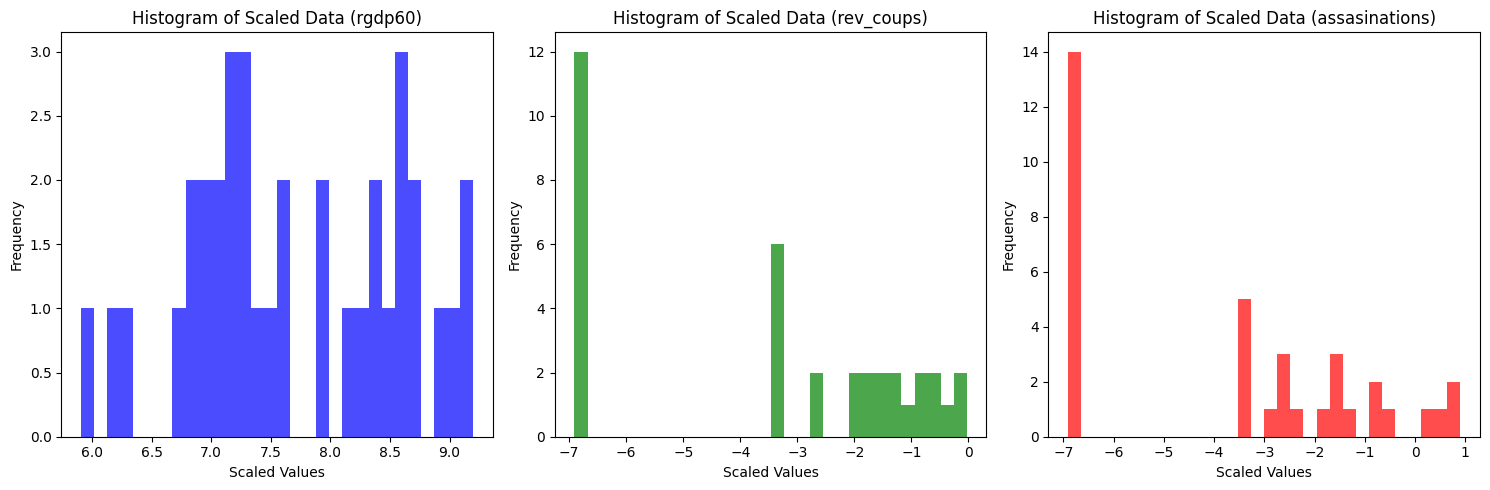

In [14]:
import matplotlib.pyplot as plt

# Plot histograms of the scaled data in a row
plt.figure(figsize=(15, 5))

# Histogram for the first feature
plt.subplot(1, 3, 1)
plt.hist(X_train_transformed["rgdp60"], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Scaled Data (rgdp60)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

# Histogram for the second feature
plt.subplot(1, 3, 2)
plt.hist(X_train_transformed["rev_coups"], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Scaled Data (rev_coups)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

# Histogram for the third feature
plt.subplot(1, 3, 3)
plt.hist(X_train_transformed["assasinations"], bins=30, color='red', alpha=0.7)
plt.title('Histogram of Scaled Data (assasinations)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


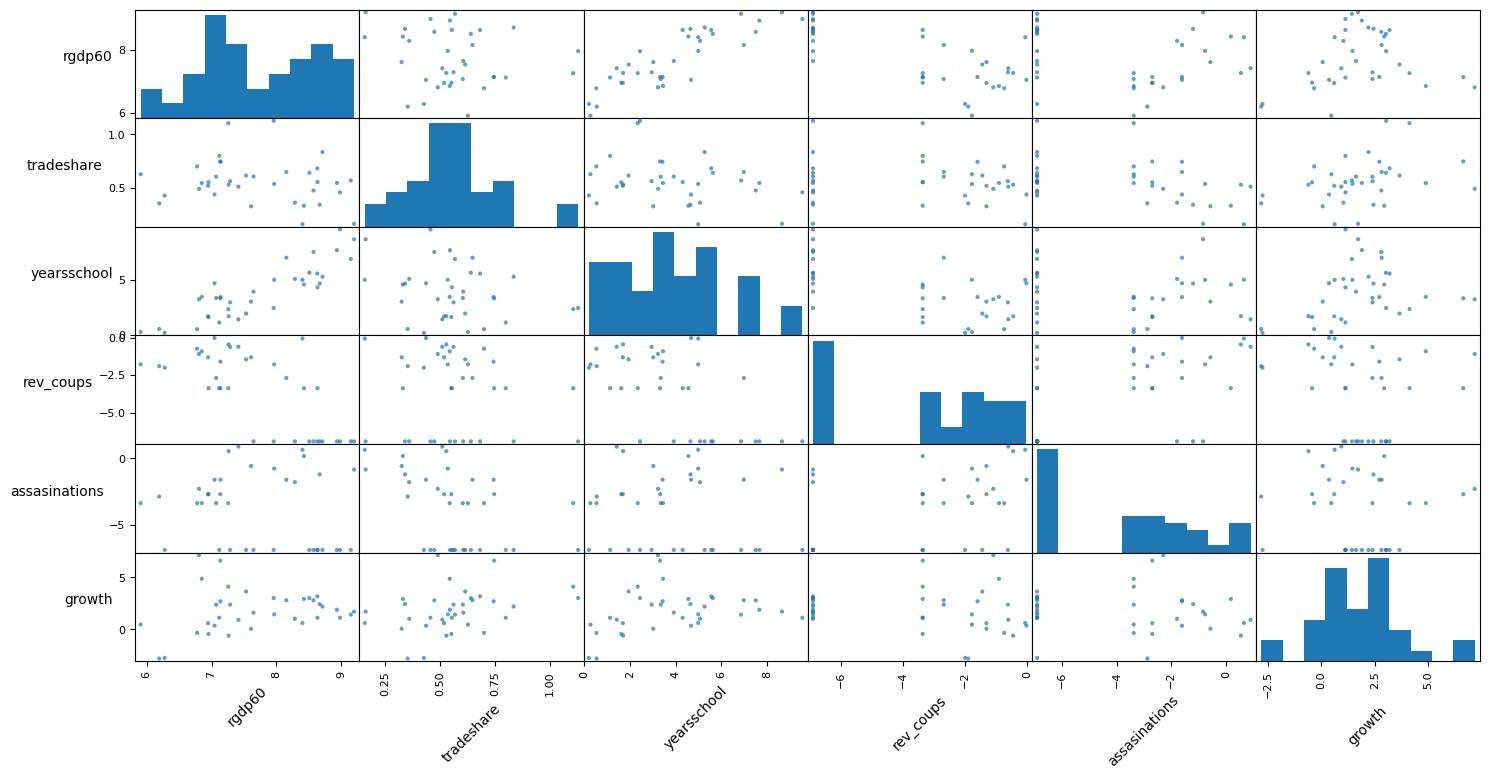

In [15]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(pd.concat([X_train_transformed,y_train],axis=1),figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Scale data to values between 0 and 1 
Since some models like Lasso tend to prefer feature with larger value ranges, we had to scale the values of each feature between 0 and 1 to transform them ot the same scale. It is important to train the scalers only on the training data to avoid leaking information from the test data during training, which reduces the independence of the test data for model evaluation.

In [16]:
# Create a StandardScaler object
scaler_std = StandardScaler()
scaler_std_trns = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_minmax_trns = MinMaxScaler()

##### Standard Scaler

In [17]:
X_train_scaled_std_and_transformed = X_train_transformed.copy()
X_test_scaled_std_and_transformed = X_test_transformed.copy()

#Fit the scaler to the data and transform the data
X_train_scaled_std_and_transformed =  pd.DataFrame(scaler_std_trns.fit_transform(X_train_transformed), columns=X_train_base.columns)
X_test_scaled_std_and_transformed =  pd.DataFrame(scaler_std_trns.transform(X_test_transformed), columns=X_train_base.columns)

In [18]:
X_train_scaled_std = X_train_base.copy()
X_test_scaled_std = X_test_base.copy()


#Fit the scaler to the data and transform the data
X_train_scaled_std =  pd.DataFrame(scaler_std.fit_transform(X_train_base), columns=X_train_base.columns)
X_test_scaled_std =  pd.DataFrame(scaler_std.transform(X_test_base), columns=X_train_base.columns)

##### MinMax Scaler

In [19]:
X_train_scaled_minmax = X_train_base.copy()
X_test_scaled_minmax = X_test_base.copy()

# Fit the scaler to the data and transform the data
X_train_scaled_minmax_and_transformed =  pd.DataFrame(scaler_minmax_trns.fit_transform(X_train_transformed), columns=X_train_base.columns)
X_test_scaled_minmax_and_transformed =  pd.DataFrame(scaler_minmax_trns.transform(X_test_transformed), columns=X_train_base.columns)

In [20]:
X_train_scaled_minmax = X_train_base.copy()
X_test_scaled_minmax = X_test_base.copy()


# Fit the scaler to the data and transform the data
X_train_scaled_minmax=  pd.DataFrame(scaler_minmax.fit_transform(X_train_transformed), columns=X_train_base.columns)
X_test_scaled_minmax =  pd.DataFrame(scaler_minmax.transform(X_test_transformed), columns=X_train_base.columns)

### Remove Outliers

Since we only have a few data points, we were not sure if removing outliers is a good idea. Hence we created for each version of preprocessed data also a version without outliers to test if removing outliers enhances our trained model.

In [102]:
def remove_outliers(data, features):
    data_copy = data.copy()
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_copy =data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)].index

    return data_copy


In [108]:
X_train_scaled_minmax_outlier = X_train_scaled_minmax.copy()
y_train_minmax_outlier = y_train.copy()
X_train_scaled_minmax_outlier = X_train_scaled_minmax.loc[remove_outliers(X_train_scaled_minmax,["yearsschool","tradeshare"])]
y_train_minmax_outlier = y_train_minmax_outlier.iloc[remove_outliers(X_train_scaled_minmax,["yearsschool","tradeshare"])]

X_train_scaled_std_outlier = X_train_scaled_std.copy()
y_train_std_outlier = y_train.copy()
X_train_scaled_std_outlier = X_train_scaled_std.loc[remove_outliers(X_train_scaled_std,["yearsschool","tradeshare"])]
y_train_std_outlier = y_train_std_outlier.iloc[remove_outliers(X_train_scaled_std,["yearsschool","tradeshare"])]

X_train_scaled_minmax_and_transformed_outlier = X_train_scaled_minmax_and_transformed.copy()
y_train_minmax_transformed_outlier = y_train.copy()
X_train_scaled_minmax_and_transformed_outlier = X_train_scaled_minmax_and_transformed.loc[remove_outliers(X_train_scaled_minmax_and_transformed,["yearsschool","tradeshare"])]
y_train_minmax_transformed_outlier = y_train_minmax_transformed_outlier.iloc[remove_outliers(X_train_scaled_minmax_and_transformed,["yearsschool","tradeshare"])]

X_train_scaled_std_and_transformed_outlier = X_train_scaled_std_and_transformed.copy()
y_train_std_transformed_outlier = y_train.copy()
X_train_scaled_std_and_transformed_outlier = X_train_scaled_std_and_transformed.loc[remove_outliers(X_train_scaled_std_and_transformed,["yearsschool","tradeshare"])]
y_train_std_transformed_outlier =  y_train_std_transformed_outlier.iloc[remove_outliers(X_train_scaled_std_and_transformed,["yearsschool","tradeshare"])]


## Model training

In [75]:
from sklearn.model_selection import GridSearchCV
# Random search of parameters, using 3 fold cross validation
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    
    print('Model Performance')
    print(f"Training MAE: {mean_absolute_error(y_train, y_train_pred)}")
    print(f"Training R2: {r2_score(y_train, y_train_pred)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")
    print(f"Test R2: {r2_score(y_test, y_test_pred)}")


def best_Random_Forrest_regressor (X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    # Number of trees in random forest
    n_estimators = range( 1800, 2100,  20)
    # Maximum number of levels in tree
    max_depth = range (5, 30, 5)
    # Minimum number of samples required to split a node
    min_samples_split = [10,15,20]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2]
  
    # Create the random grid
    grid = {'n_estimators': n_estimators,
                'max_features': ['sqrt'],
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': [False]}
    
    rf_grid = GridSearchCV(rf, grid, cv = 3, verbose=2,  n_jobs = -1)
    # Fit the random search model
    rf_grid.fit(X_train, y_train)
    
    best_rf = rf_grid.best_estimator_
    random_accuracy = evaluate(best_rf,  X_train, X_test, y_train, y_test)
    return best_rf

In [69]:
def best_XGBoost_regressor (X_train, X_test, y_train, y_test):
    xgb = XGBRegressor(objective='reg:squarederror')
    # Number of trees in random forest
    grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(1, 25, 2),
    'learning_rate': [0.1, 0.075, 0.05, 0.025, 0.01,]
    }

    xgb_grid = GridSearchCV(xgb, grid, cv = 3, verbose=2,  n_jobs = -1)
    
    # Fit the random search model
    xgb_grid.fit(X_train, y_train)
    
    best_xgb = xgb_grid.best_estimator_
    random_accuracy = evaluate(best_xgb,  X_train, X_test, y_train, y_test)
    return best_xgb

In [33]:
from numpy import arange
def best_lasso_regressor (X_train, X_test, y_train, y_test):
    lasso = Lasso()
    # Number of trees in random forest
    grid = {
    'alpha': arange(0, 1, 0.01)
    }

    lasso_grid = GridSearchCV(lasso, grid, cv = 3, verbose=2,  n_jobs = -1)
    
    # Fit the random search model
    lasso_grid.fit(X_train, y_train)
    
    best_lasso = lasso_grid.best_estimator_
    random_accuracy = evaluate(best_lasso,  X_train, X_test, y_train, y_test)
    return best_lasso

### Base line model

To evaluate if the pre-processing steps were actually helpful to improve model performance, we first build a base line model for each regression method. Here we only transformed the data into the correct format and removed the not relevant features.

In [44]:
rf_base = best_Random_Forrest_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12150 fits failed out of a total of 24300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5935 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\lo

Model Performance
Training MAE: 0.7175706426122045
Training R2: 0.771777646876941
Test MAE: 1.5945250508603228
Test R2: -0.23188304491904965


In [70]:
xgb_base = best_XGBoost_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [34]:
lasso_base = best_lasso_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.2581495817078006
Training R2: 0.289499226490194
Test MAE: 1.5693400676514413
Test R2: 0.10923208550351449


### Use scaled data

In [76]:
rf_scaled_minmax = best_Random_Forrest_regressor (X_train_scaled_minmax, X_test_scaled_minmax, y_train, y_test)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


KeyboardInterrupt: 

In [71]:
xgb_scaled_minmax = best_XGBoost_regressor (X_train_scaled_minmax, X_test_scaled_minmax, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [47]:
lasso_scaled_minmax = best_lasso_regressor (X_train_scaled_minmax, X_test_scaled_minmax, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4082506624034947
Training R2: 0.11895537702207548
Test MAE: 1.4248844243139163
Test R2: 0.08219126879991168


In [ ]:
rf_scaled_std = best_Random_Forrest_regressor (X_train_scaled_std, X_test_scaled_std, y_train, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


In [48]:
xgb_scaled_std = best_XGBoost_regressor (X_train_scaled_std, X_test_scaled_std, y_train, y_test)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [49]:
lasso_scaled_std = best_lasso_regressor (X_train_scaled_std, X_test_scaled_std, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.3899991520400101
Training R2: 0.13637902384772482
Test MAE: 1.4587803365955643
Test R2: 0.07540566646408575


#### Use transformed data

In [ ]:
rf_transforemd_std = best_Random_Forrest_regressor (X_train_scaled_std_and_transformed, X_test_scaled_std_and_transformed, y_train, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


In [50]:
xgb_transformed_std = best_XGBoost_regressor (X_train_scaled_std_and_transformed, X_test_scaled_std_and_transformed, y_train, y_test)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [51]:
lasso_transformed_std = best_lasso_regressor (X_train_scaled_std_and_transformed, X_test_scaled_std_and_transformed, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.3899991520400101
Training R2: 0.13637902384772482
Test MAE: 1.4587803365955643
Test R2: 0.07540566646408575


In [ ]:
rf_transformed_minmax = best_Random_Forrest_regressor (X_train_scaled_minmax_and_transformed, X_test_scaled_minmax_and_transformed, y_train, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


In [77]:
xgb_transformed_minmax= best_XGBoost_regressor (X_train_scaled_minmax_and_transformed, X_test_scaled_minmax_and_transformed, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [53]:
lasso_transformed_minmax = best_lasso_regressor (X_train_scaled_minmax_and_transformed, X_test_scaled_minmax_and_transformed, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4082506624034947
Training R2: 0.11895537702207548
Test MAE: 1.4248844243139163
Test R2: 0.08219126879991168


In [55]:
lasso_transformed_minmax

Lasso(alpha=0.11)

#### Use data without outliers

In [ ]:
rf_scaled_outlier_minmax = best_Random_Forrest_regressor (X_train_scaled_minmax_outlier, X_test_scaled_minmax, y_train_minmax_outlier, y_test)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


KeyboardInterrupt: 

In [113]:
xgb_scaled_outlier_minmax = best_XGBoost_regressor (X_train_scaled_minmax_outlier, X_test_scaled_minmax, y_train_minmax_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [115]:
lasso_scaled_outlier_minmax = best_lasso_regressor (X_train_scaled_minmax_outlier, X_test_scaled_minmax, y_train_minmax_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4638505585263548
Training R2: 0.09854690755071771
Test MAE: 1.3667245187123873
Test R2: 0.1106798927891054


In [125]:
lasso_scaled_outlier_minmax

Lasso(alpha=0.09)

In [ ]:
rf_scaled_outlier_std = best_Random_Forrest_regressor (X_train_scaled_std_outlier, X_test_scaled_minmax, y_train_std_outlier, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


In [116]:
xgb_scaled_outlier_std = best_XGBoost_regressor (X_train_scaled_std_outlier, X_test_scaled_std, y_train_std_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [117]:
lasso_scaled_outlier_std = best_lasso_regressor (X_train_scaled_std_outlier, X_test_scaled_std, y_train_std_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4577035544286923
Training R2: 0.10882467733791912
Test MAE: 1.367126567059672
Test R2: 0.11433487957128907


In [124]:
lasso_scaled_outlier_std

Lasso(alpha=0.39)

In [122]:
rf_transforemd_outlier_std = best_Random_Forrest_regressor (X_train_scaled_std_and_transformed_outlier, X_test_scaled_std_and_transformed, y_train_std_transformed_outlier, y_test)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


KeyboardInterrupt: 

In [120]:
xgb_transformed_outlier_std = best_XGBoost_regressor (X_train_scaled_std_and_transformed_outlier, X_test_scaled_std_and_transformed, y_train_std_transformed_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [121]:
lasso_transformed_outlier_std = best_lasso_regressor (X_train_scaled_std_and_transformed_outlier, X_test_scaled_std_and_transformed, y_train_std_transformed_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4577035542404042
Training R2: 0.1088246775384436
Test MAE: 1.3671265668851005
Test R2: 0.11433487968198197


In [ ]:
rf_transformed_outlier_minmax = best_Random_Forrest_regressor (X_train_scaled_minmax_and_transformed_outlier, X_test_scaled_minmax_and_transformed, y_train_minmax_transformed_outlier, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


In [118]:
xgb_transformed_outlier_minmax= best_XGBoost_regressor (X_train_scaled_minmax_and_transformed_outlier, X_test_scaled_minmax_and_transformed, y_train_minmax_transformed_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [119]:
lasso_transformed_outlier_minmax = best_lasso_regressor (X_train_scaled_minmax_and_transformed_outlier, X_test_scaled_minmax_and_transformed, y_train_minmax_transformed_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4638505585263548
Training R2: 0.09854690755071771
Test MAE: 1.3667245187123873
Test R2: 0.1106798927891054


## Training the final 
The training showed that neither using a std nor a minmax is dominant. Further, transforming the skewed data using the log is not improving the results. Scaling and outlier removal seem to improve the model.

In [127]:
X_final = train_data.drop(['growth'], axis=1)
y_final = train_data['growth']
X_final.shape

(45, 5)

In [128]:
# Create a dScaler object
scaler_std_final = StandardScaler()
scaler_minmax_final = MinMaxScaler()

#Fit the scaler to the data and transform the data
X_scaled_std =  pd.DataFrame(scaler_std_final.fit_transform(X_final), columns=X_final.columns)
X_scaled_minmax =  pd.DataFrame(scaler_minmax_final.fit_transform(X_final), columns=X_final.columns)


X_scaled_std_outlier = X_scaled_std.loc[remove_outliers(X_scaled_std,["yearsschool","tradeshare"])]
y_std_outlier = y_final.iloc[remove_outliers(X_scaled_std,["yearsschool","tradeshare"])]


X_scaled_minmax_outlier = X_scaled_minmax.loc[remove_outliers(X_scaled_minmax,["yearsschool","tradeshare"])]
y_minmax_outlier = y_final.iloc[remove_outliers(X_scaled_minmax,["yearsschool","tradeshare"])]

In [131]:
lasso_minmax = Lasso(alpha=0.09)
lasso_minmax.fit(X_scaled_minmax_outlier, y_minmax_outlier)

Lasso(alpha=0.09)

In [132]:
lasso_std = Lasso(alpha=0.39)
lasso_std.fit(X_scaled_std_outlier, y_std_outlier)

Lasso(alpha=0.39)

### Apply model to test data

In [162]:
test_data=pd.read_csv('./growth_test.csv').drop("Unnamed: 0",axis=1)
test_data["rgdp60"]=test_data.rgdp60.apply(lambda x: x.replace(",",".")).astype(float)
test_data["tradeshare"]=test_data.tradeshare.apply(lambda x: x.replace(",",".")).astype(float)
test_data["yearsschool"]=test_data.yearsschool.apply(lambda x: x.replace(",",".")).astype(float)
test_data["rev_coups"]=test_data.rev_coups.apply(lambda x: x.replace(",",".")).astype(float)
test_data["assasinations"]=test_data.assasinations.apply(lambda x: x.replace(",",".")).astype(float)

test_data.drop(["oil","country_name"], axis=1,inplace=True)
test_data

,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,765.999817,0.140502,1.45,0.133333,0.866667
1,2953.999512,0.157703,6.71,0.000000,0.200000
2,1783.999878,0.160405,2.89,0.100000,0.100000
3,951.999817,0.221458,0.79,0.306481,0.175000
4,3123.001465,0.299406,3.80,0.066667,1.433333
5,1684.000366,0.313073,2.97,0.100000,0.766667
6,923.999939,0.324746,0.70,0.374074,0.200000
7,7782.002441,0.329479,9.03,0.000000,0.066667
8,2836.000244,0.393251,2.41,0.000000,0.166667
9,6569.998535,0.442143,7.64,0.066667,0.233333


In [140]:
X_test_scaled_std =  pd.DataFrame(scaler_std_final.transform(test_data), columns=X_final.columns)
X_test_scaled_minmax =  pd.DataFrame(scaler_minmax_final.transform(test_data), columns=X_final.columns)

In [142]:
prediction_minmax = lasso_minmax.predict(X_test_scaled_minmax)
prediction_std = lasso_std.predict(X_test_scaled_std)

In [163]:
pd.read_csv('./growth_test.csv')["Unnamed: 0"]

0      0
1      2
2      3
3      5
4      6
5      7
6      9
7     10
8     16
9     20
10    21
11    22
12    26
13    37
14    47
15    50
16    54
17    56
18    57
19    64
Name: Unnamed: 0, dtype: int64

In [164]:
prediction_minmax_df = pd.DataFrame(prediction_minmax, columns=['Expected'])
prediction_minmax_df["Id"]=pd.read_csv('./growth_test.csv')["Unnamed: 0"]
prediction_minmax_df.to_csv("results_minmax.csv", index=False)
prediction_minmax_df

,Expected,Id
0,1.327499,0
1,2.062211,2
2,1.532556,3
3,1.256748,5
4,1.694748,6
5,1.583040,7
6,1.270894,9
7,2.428615,10
8,1.525972,16
9,2.264692,20


In [165]:
prediction_std_df = pd.DataFrame(prediction_std, columns=['Expected'])
prediction_std_df["Id"]=pd.read_csv('./growth_test.csv')["Unnamed: 0"]
prediction_std_df.to_csv("excercise1_growth_submission.csv", index=False)
prediction_std_df

,Expected,Id
0,1.336573,0
1,2.010770,2
2,1.525714,3
3,1.276978,5
4,1.683267,6
5,1.581809,7
6,1.296598,9
7,2.357519,10
8,1.534699,16
9,2.214612,20
